In [1]:
import umap
import numpy as np
import pandas as pd

import jscatter 

import matplotlib.pyplot as plt

import humap
from datasets import load_dataset

import time



In [2]:
%%time
import pickle 

with open('./../datasets/arxiv_titles/embeddings_0.pkl', 'rb') as f:
    data0 = pickle.load(f)
with open('./../datasets/arxiv_titles/embeddings_1.pkl', 'rb') as f:
    data1 = pickle.load(f)
with open('./../datasets/arxiv_titles/embeddings_2.pkl', 'rb') as f:
    data2 = pickle.load(f)

data = data0+data1+data2
del data0
del data1
del data2

documents = [d[0] for d in data]
sentence_embeddings = np.array([d[1] for d in data])
del data


CPU times: user 4.04 s, sys: 10.8 s, total: 14.9 s
Wall time: 49 s


In [3]:
sentence_embeddings.shape

(2250000, 768)

In [4]:
N = 100000
indices = np.random.choice(sentence_embeddings.shape[0], N, replace=False).tolist()
documents = np.array(documents)[indices]
sentence_embeddings = sentence_embeddings[indices]

In [5]:
y = np.zeros(sentence_embeddings.shape[0])

hUmap = humap.HUMAP(np.array([0.2, 0.2]), verbose=True)
hUmap.fit(sentence_embeddings, y)

L0 - 100000 data samples.
L0 - Fitting: done in 94.259552 seconds.

L1 - 20000 data samples.
L1 - Selecting Landmarks: done in 0.264769 seconds.
L1 - Constructing Neighborhood: done in 25.438246 seconds.
L1 - Sparse Similarity: done in 0.278487 seconds.
L1 - Fitting: done in 0.498057 seconds.
L1 - Associating data points to landmarks: done in 0.052607 seconds.
L1 - Construction: done in 27.386200

L2 - 4000 data samples.
L2 - Selecting Landmarks: done in 0.039919 seconds.
L2 - Constructing Neighborhood: done in 0.919506 seconds.
L2 - Sparse Similarity: done in 0.045108 seconds.
L2 - Fitting: done in 0.060190 seconds.
L2 - Associating data points to landmarks: done in 0.004880 seconds.
L2 - Construction: done in 1.346612

Hierarchical Representation: done in 123.250183 seconds.


In [6]:
embedding2 = hUmap.transform(2)

Initial low-dimensional representation: done in 0.005959 seconds.

Embedding level 2 with 4000 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 1.728469 seconds.


In [7]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding2)
embedding1 = hUmap.transform(1)

Initial low-dimensional representation: done in 0.003835 seconds.

Embedding level 1 with 20000 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 14.376681 seconds.


In [8]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding1)
embedding = hUmap.transform(0)

Initial low-dimensional representation: done in 0.016775 seconds.

Embedding level 0 with 100000 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 43.424648 seconds.


In [9]:
original_indices2 = hUmap.original_indices(2)
original_indices1 = hUmap.original_indices(1)

documents2 = []
for i in range(len(original_indices2)):
    documents2.append(documents[original_indices2[i]])

documents1 = []
for i in range(len(original_indices1)):
    documents1.append(documents[original_indices1[i]])
    
df2 = pd.DataFrame({   
    'id': np.arange(len(embedding2)),
    'x': embedding2[:, 0],
    'y': embedding2[:, 1],
    'document': documents2,
    'labels': y[hUmap.original_indices(2)],
    'original_indices': original_indices2,
})

df1 = pd.DataFrame({    
    'id': np.arange(len(embedding1)),
    'x': embedding1[:, 0],
    'y': embedding1[:, 1],
    'document': documents1,
    'labels': y[hUmap.original_indices(1)],
    'original_indices': original_indices1,
})

df = pd.DataFrame({    
    'id': np.arange(len(y)),
    'x': embedding[:, 0],
    'y': embedding[:, 1],
    'document': documents,
    'labels': y,
    'original_indices': np.arange(len(y)),
})


In [10]:
config = dict(
    background_color='#FFFFFF',
    color_by='labels',
    color_map=['#000000', '#f57e42'] 
)

scatter = jscatter.Scatter(data=df, x='x', y='y', **config)
scatter1 = jscatter.Scatter(data=df1, x='x', y='y', **config)
scatter2 = jscatter.Scatter(data=df2, x='x', y='y', **config)

jscatter.link([scatter2, scatter1, scatter], rows=1, row_height=640, match_by='original_indices')

GridBox(children=(HBox(children=(VBox(children=(Button(button_style='primary', icon='arrows', layout=Layout(wi…

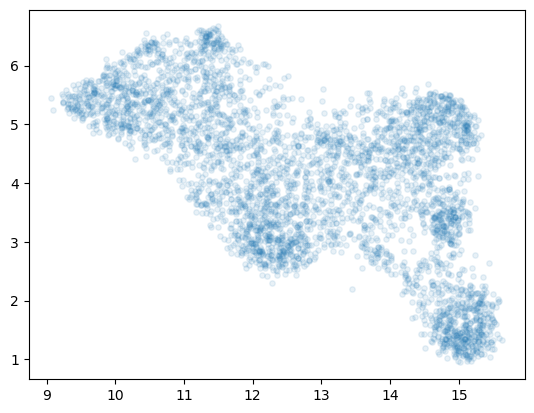

In [11]:
plt.scatter(embedding2[:, 0], embedding2[:, 1], s=15, alpha=0.1)

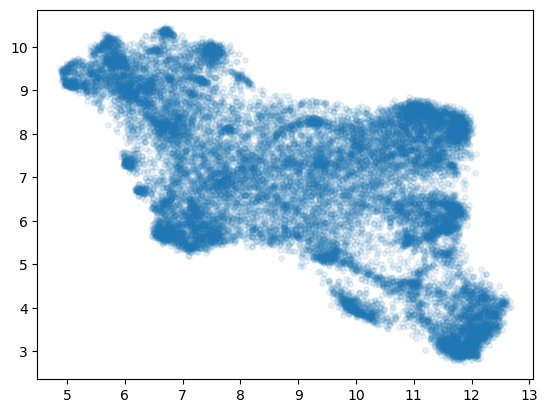

In [12]:
plt.scatter(embedding1[:, 0], embedding1[:, 1],s=15, alpha=0.1)

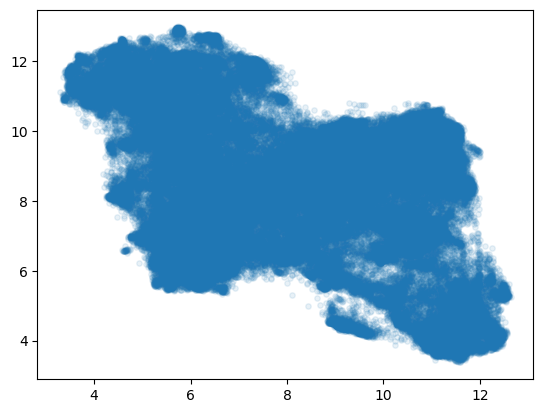

In [13]:
plt.scatter(embedding[:, 0], embedding[:, 1],s=15, alpha=0.1)